In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import fbprophet

In [319]:
df = pd.read_csv("../data/data.csv", parse_dates=['Date']) 

In [320]:
df.shape

(102991, 4)

In [321]:
df.head()

,Network_Element_id,Date,Hour,KPI_value
0,GGCBT18,2019-01-01,0:00:00,72.212479
1,GGCBT11,2019-01-01,0:00:00,82.722656
2,GGBNB02,2019-01-01,0:00:00,67.719064
3,GGBNB01,2019-01-01,0:00:00,65.954449
4,GGCBT14,2019-01-01,0:00:00,55.161517


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102991 entries, 0 to 102990
Data columns (total 4 columns):
Network_Element_id    102991 non-null object
Date                  102991 non-null datetime64[ns]
Hour                  102991 non-null object
KPI_value             102991 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.1+ MB


In [323]:
df.describe()

,KPI_value
count,102991.000000
mean,47.945163
std,25.222759
min,0.000000
25%,31.225103
50%,54.700695
75%,68.238598
max,358.083077


In [324]:
df['KPI_value'].value_counts()

0.000000e+00    11
3.700000e-09     4
1.850000e-09     4
1.110000e-08     3
7.410000e-09     3
                ..
6.746869e+01     1
1.903979e-01     1
4.058240e+01     1
2.125109e+01     1
6.087912e+01     1
Name: KPI_value, Length: 101846, dtype: int64

In [325]:
all_nw_cards = df['Network_Element_id'].unique()
_current=all_nw_cards[0]

In [326]:
df.drop('Hour', axis=1, inplace=True)
df = df.drop(df[df['Network_Element_id'] != _current].index)
del df['Network_Element_id']

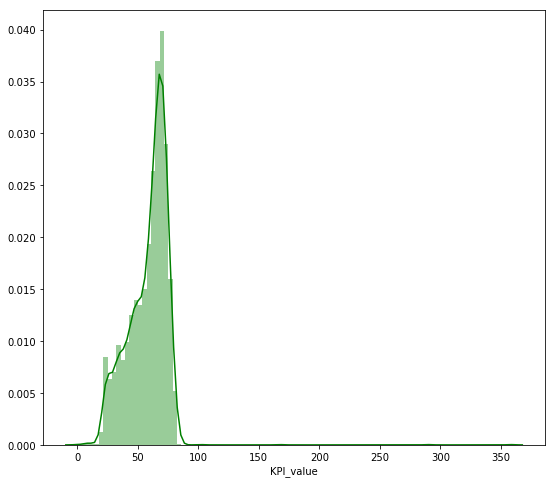

In [327]:
plt.figure(figsize=(9, 8))
sns.distplot(df['KPI_value'], color='g', bins=100, hist_kws={'alpha': 0.4});

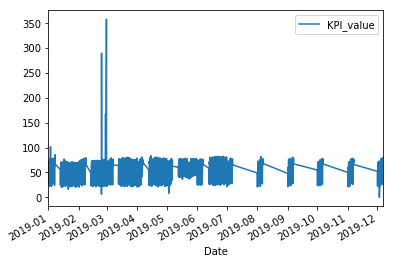

In [328]:
df.plot.line(x = 'Date', y = 'KPI_value')
plt.show()

In [329]:
len(df['KPI_value'].unique())

4385

In [330]:
df.dtypes

Date         datetime64[ns]
KPI_value           float64
dtype: object

In [331]:
# df = df.set_index('Date')

In [332]:
df.head(10)

,Date,KPI_value
0,2019-01-01 00:00:00,72.212479
23,2019-01-01 01:00:00,63.495912
46,2019-01-01 02:00:00,49.351213
69,2019-01-01 03:00:00,36.299342
92,2019-01-01 04:00:00,27.352099
115,2019-01-01 05:00:00,33.009948
141,2019-01-01 06:00:00,40.234924
161,2019-01-01 07:00:00,50.082368
184,2019-01-01 08:00:00,59.167740
207,2019-01-01 09:00:00,64.222519


In [333]:
# mod = sm.tsa.SARIMAX(df['KPI_value'])
# results = mod.fit()
# print(results.summary())

                           Statespace Model Results                           
Dep. Variable:              KPI_value   No. Observations:                 4433
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -16935.815
Date:                Fri, 13 Dec 2019   AIC                          33875.629
Time:                        00:36:57   BIC                          33888.423
Sample:                             0   HQIC                         33880.140
                               - 4433                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9834      0.001    878.226      0.000       0.981       0.986
sigma2       121.7712      0.221    551.191      0.000     121.338     122.204
Ljung-Box (Q):                     1632.05   Jarque-

/Users/sandeep/miniconda3/envs/cango/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


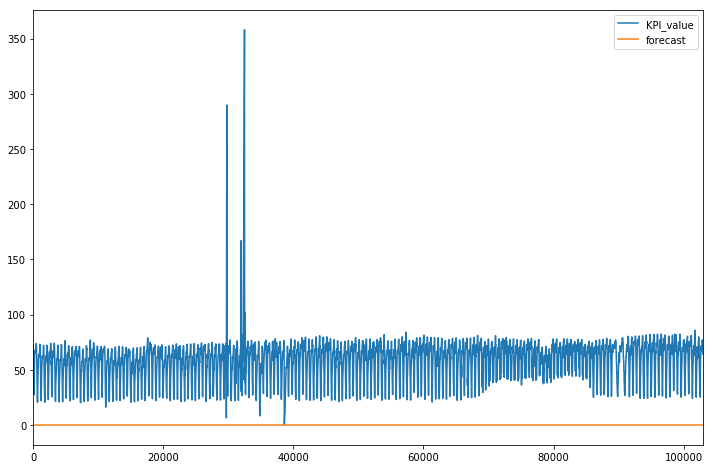

In [334]:
# df['forecast'] = results.predict(dynamic= True)  
# df[['KPI_value', 'forecast']].plot(figsize=(12, 8))
# plt.show()

In [303]:
# Prophet requires columns ds (Date) and y (value)
df = df.rename(columns={'Date': 'ds', 'KPI_value': 'y'})
# Put market cap in billions
# gm['y'] = gm['y'] / 1e9
# Make the prophet model and fit on the data
# gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)

df.head()

,ds,y
0,2019-01-01 00:00:00,72.212479
23,2019-01-01 01:00:00,63.495912
46,2019-01-01 02:00:00,49.351213
69,2019-01-01 03:00:00,36.299342
92,2019-01-01 04:00:00,27.352099


In [313]:
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=1.0,yearly_seasonality=True)
gm_prophet.fit(df)

In [314]:
gm_forecast = gm_prophet.make_future_dataframe(periods=100, freq='D')

In [315]:
gm_forecast = gm_prophet.predict(gm_forecast)

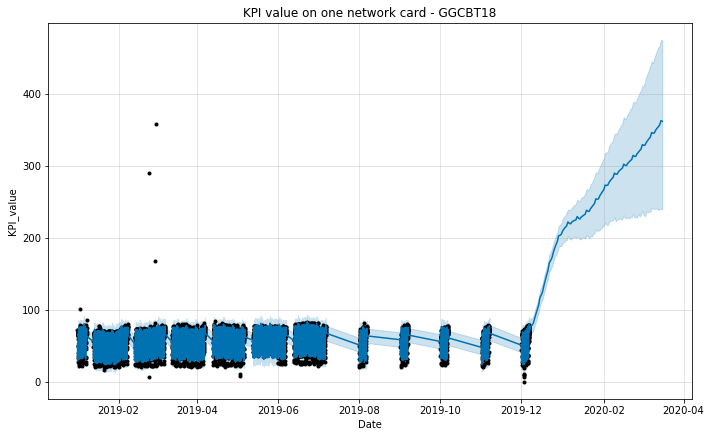

In [316]:
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'KPI_value')
plt.title('KPI value on one network card - '+_current);